## Logistic Regression using Iris Dataset
#### Student Name - Swapnil Bandgar
#### Student ID - 500186962

In [2]:
#importing maths library 
import numpy as np
import pandas as pd

#imports from sklearn library

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix


#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as pyplot
sns.set(style="darkgrid")

#To plot the graph embedded in the notebook
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
#loading the Iris dataset direclty from sklearn as its toy dataset

df_iris = datasets.load_iris()

In [3]:
print("Type of iris dataset: ", type(df_iris))
print('\n')
print("keys of iris dataset: ", df_iris.keys())
print('\n')
print("shape of iris dataset: ", df_iris.data.shape)
print('\n')
print("features of iris dataset: ", df_iris.feature_names)

Type of iris dataset:  <class 'sklearn.utils.Bunch'>


keys of iris dataset:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


shape of iris dataset:  (150, 4)


features of iris dataset:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print("description of Iris dataset: \n", df_iris.DESCR)

description of Iris dataset: 
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ====

In [4]:
print("Feature names of iris dataset: ", df_iris.feature_names)
print('\n')
print("Target of iris dataset: ", df_iris.target)
print('\n')
print("Target names of iris dataset: ", df_iris.target_names)

Feature names of iris dataset:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Target of iris dataset:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Target names of iris dataset:  ['setosa' 'versicolor' 'virginica']


In [21]:
iris_feature = pd.DataFrame(df_iris.data, columns = df_iris.feature_names)
iris_feature['type'] = df_iris.target

print("Iris feature head : \n\n", iris_feature.head())

Iris feature head : 

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   type  
0     0  
1     0  
2     0  
3     0  
4     0  


In [22]:
# describing the feature for dataset
iris_feature.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Exploratory data analysis

In [23]:
# Checking if there are any missing values in the data.
iris_feature.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
type                 0
dtype: int64

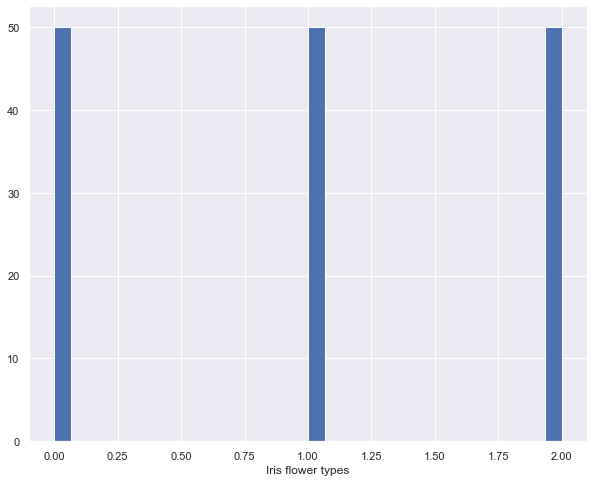

In [10]:
pyplot.figure(figsize=(10,8))
pyplot.hist(iris_feature['type'], bins=30)
pyplot.xlabel("Iris flower types")
pyplot.show()

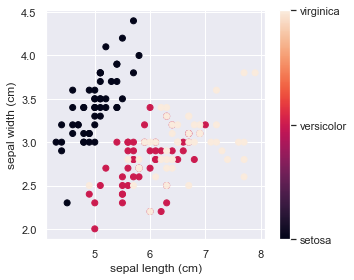

In [8]:
# The indices of the features that we are plotting (class 0 & 1)
x_index = 0
y_index = 1
# this formatter will label the colorbar with the correct target names
formatter = pyplot.FuncFormatter(lambda i, *args: df_iris.target_names[int(i)])
pyplot.figure(figsize=(5, 4))
pyplot.scatter(df_iris.data[:, x_index], df_iris.data[:, y_index], c=df_iris.target)
pyplot.colorbar(ticks=[0, 1, 2], format=formatter)
pyplot.xlabel(df_iris.feature_names[x_index])
pyplot.ylabel(df_iris.feature_names[y_index])
pyplot.tight_layout()
pyplot.show()

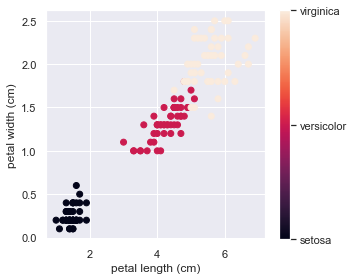

In [9]:
x_index = 2
y_index = 3
# this formatter will label the colorbar with the correct target names
formatter = pyplot.FuncFormatter(lambda i, *args: df_iris.target_names[int(i)])
pyplot.figure(figsize=(5, 4))
pyplot.scatter(df_iris.data[:, x_index], df_iris.data[:, y_index], c=df_iris.target)
pyplot.colorbar(ticks=[0, 1, 2], format=formatter)
pyplot.xlabel(df_iris.feature_names[x_index])
pyplot.ylabel(df_iris.feature_names[y_index])
pyplot.tight_layout()
pyplot.show()

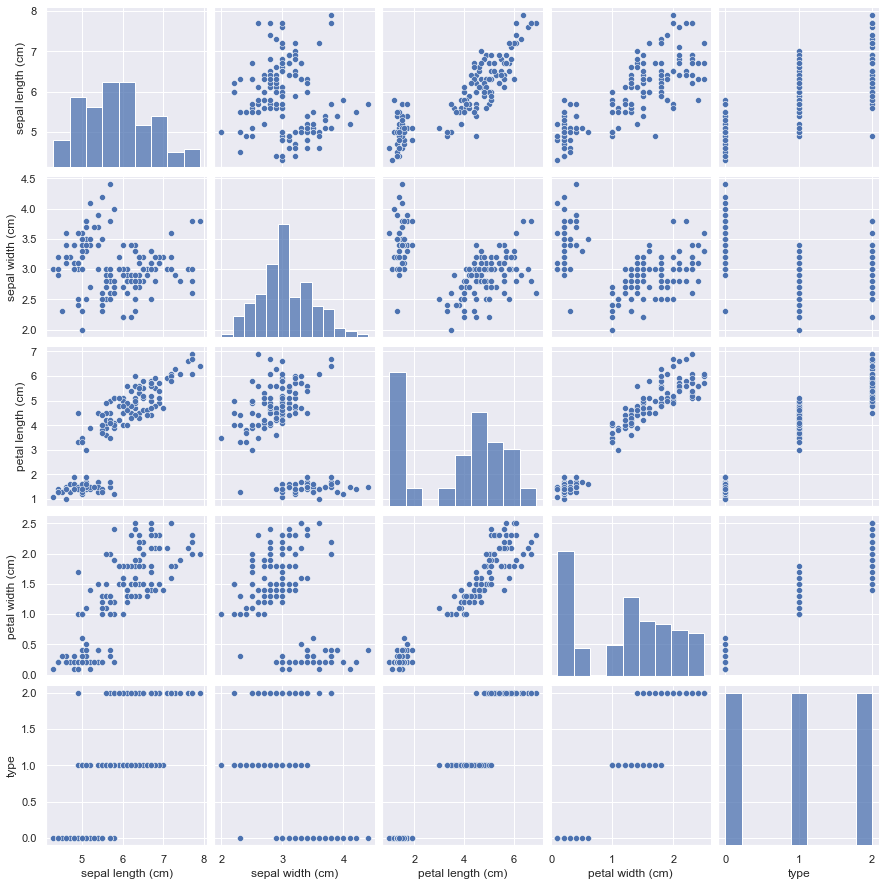

In [13]:
sns.pairplot(iris_feature)

In [10]:
# identify correlation in Iris dataset
correlation = iris_feature.corr()

In [11]:
correlation.shape

(5, 5)

In [12]:
correlation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
type,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

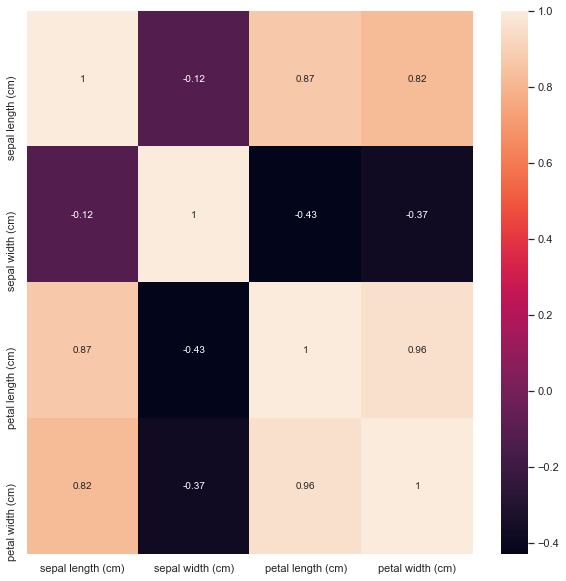

In [5]:
#Created a dataframe without the price colomn, since we need to see the correlation between the variables
pyplot.figure(figsize=(10,10))

iris_features1 = pd.DataFrame(df_iris.data, columns = df_iris.feature_names)

correlation_matrix = iris_features1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [7]:
# Sperate train and test data
X = iris_feature.drop('type',axis=1)
y = iris_feature['type']

In [8]:
# Sperate train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 4)
(15, 4)
(135,)
(15,)


## Standardizing the given data

In [16]:
# We are using standaed scaler from sklearn for standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [44]:
model=DecisionTreeClassifier()


In [45]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2])

In [49]:
# getting model score
model.score(X_test, y_test)

1.0

In [50]:
model.predict_proba(X_test)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [51]:
y_pred = model.predict(X_test)

In [52]:
y_pred_train = model.predict(X_train)

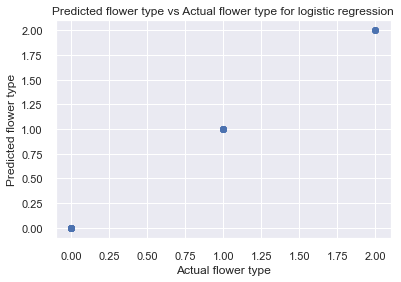

In [54]:
# plot prediction and actual data
pyplot.scatter(y_test,y_pred)
pyplot.xlabel("Actual flower type")
pyplot.ylabel("Predicted flower type")
pyplot.title("Predicted flower type vs Actual flower type for logistic regression")
pyplot.show()

In [55]:
predictions = model.predict(X_test)
#compare predicted values with the actual scores
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
compare_df

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,2,2
6,1,1
7,0,0
8,2,2
9,1,1


In [56]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[7 0 0]
 [0 5 0]
 [0 0 3]]


<AxesSubplot:>

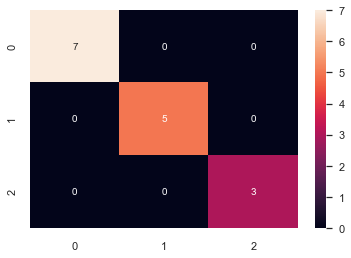

In [57]:
sns.heatmap(cf_matrix, annot=True)

In [59]:
cf_report = classification_report(y_test, y_pred)
print(cf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



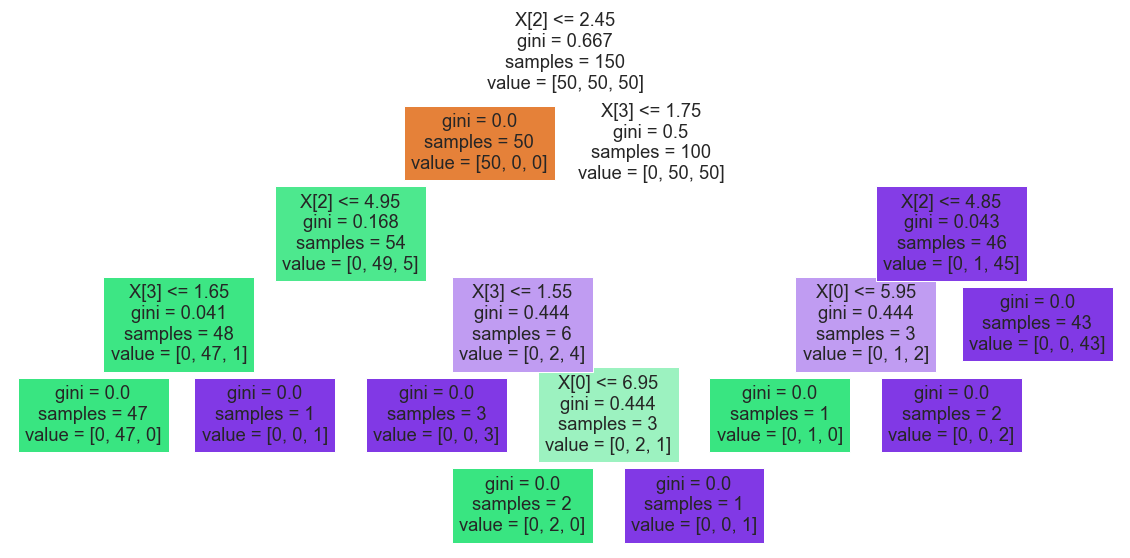

In [25]:
# Apply the decision tree classifier model to the data using all four parameters at once.
model_all_params = DecisionTreeClassifier().fit(df_iris.data, df_iris.target)
# Prepare a plot figure with set size.
pyplot.figure(figsize = (20,10))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(model_all_params, 
          filled=True      )
# Display the tree plot figure.
pyplot.show()

We may very simply add the max_depth parameter to the model with a value of 3 and observe the effect of forcing some simplicity on the tree, akin to pruning all the smallest branches of a tree down to a few points of divergence closest to the trunk.

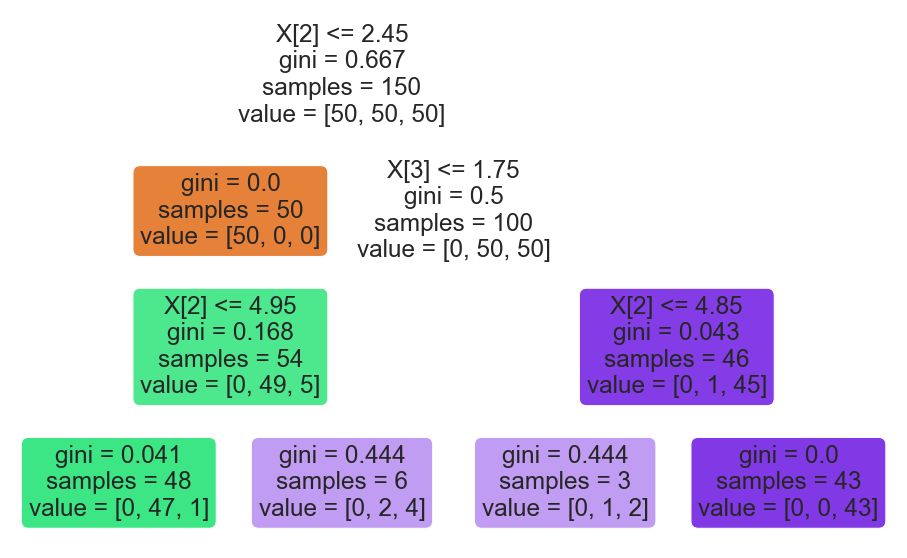

In [14]:
# Apply the decision tree classifier model to the data using all four parameters at once, but with a maximum tree depth of 3
model_all_params_max_depth_3 = DecisionTreeClassifier(max_depth = 3).fit(df_iris.data, df_iris.target)
# Prepare a plot figure with set size.
pyplot.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(model_all_params_max_depth_3,
          rounded = True,
          filled = True                )
# Display the tree plot figure.
pyplot.show()

This leaves (no pun intended) us with only four misclassified points by applying a total of four tests, and trimming one level sooner, i.e., setting max_depth to 2, would only have six errors out of the 150 points.

Another approach we might consider is to mandate that there must be a significant increase in impurity for the split to occur. Setting the min_impurity_decrease parameter will allow us to restrict splits to those that significantly improve the results of the overal model behavior.

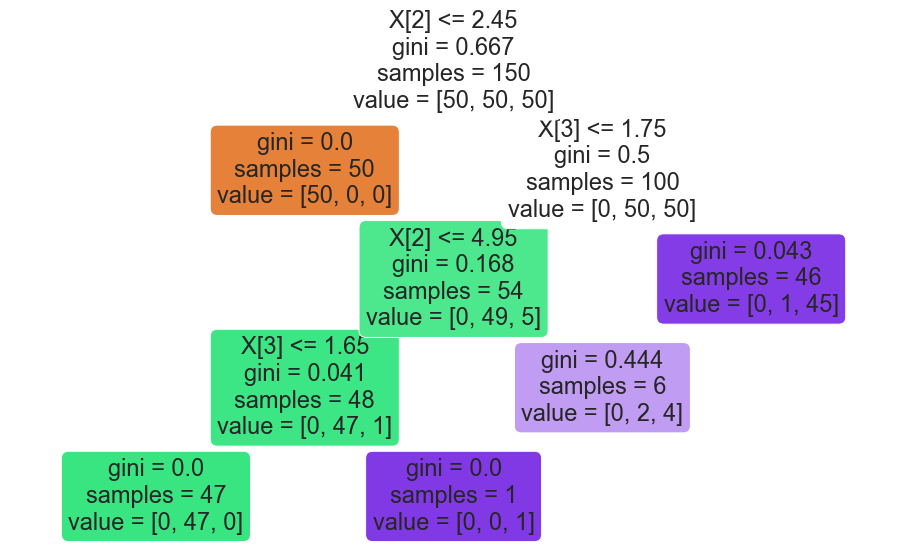

In [16]:
# Apply the model to the data as before, but with a minimum impurity decrease of 0.01
model_all_params_min_imp_dec_001 = DecisionTreeClassifier(min_impurity_decrease = 0.01).fit(df_iris.data, df_iris.target)
# Prepare a plot figure with set size.
pyplot.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(model_all_params_min_imp_dec_001,
          rounded = True,
          filled = True                )
# Display the tree plot figure.
pyplot.show()

This approach gets us to three misclassified points out of 150 with the same number of tests as before with max_depth = 3, but we are now able to apply the questions a bit more efficiently.
